In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json

#country count
output_file = os.path.join("output_data", "country_player_count.csv")


In [21]:
# get joined_yearmonth dataframe for player details file
def get_chessplayer_details_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    joined_months = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_month = time.strftime('%m', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
            joined_months.append(joined_month)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_month"] = joined_months
    chessplayers_df["joined_date"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m-%d")
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [15]:
# pass country code
def get_status_summary(country):
    output_data_players = f"output_data/players_{country}.csv"
    
    chessplayers_sample_df = get_chessplayer_details_dataframe(f"output_data/player_details_{country}.csv")
    
    # group grouped_status_chessplayers_IN_df by status
    grouped_status_chessplayers_sample_df = chessplayers_sample_df.groupby(["status"])
    count_sample = chessplayers_sample_df["player_index"].count()
    print(f"Recent user count (sample) {country} {count_sample}")

    # read csv to count users (total population) of players in IN
    chessplayers_population_df = pd.read_csv(output_data_players)
    count_players_population = chessplayers_population_df["player_index"].count()
    print(f"Recent user count (population) {country} {count_players_population}")

    # count statuses
    count_status = grouped_status_chessplayers_sample_df["status"].count()
    percent_sample_status = grouped_status_chessplayers_sample_df["status"].count() / count_sample
    estimated_population_status = percent_sample_status * count_players_population

    # Assemble the resulting series into a single summary dataframe.
    summary_status_df = pd.DataFrame(
        {"Status": count_status,  
         "Percent (of sample)": percent_sample_status,
         "Estimated Status Count of Population": round(estimated_population_status,0)
        })
    return summary_status_df

In [22]:
# Get top player count 
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              

        country_name.append(row["Country"])
        country_codes.append(row["Code"])
        player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]

count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)
count_sorted_cleaned.head(10)

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
5,Germany,DE,117887
6,Italy,IT,117604
7,Spain,ES,112180
8,Poland,PL,108111
9,Russian Federation,RU,103656


In [24]:
top_10_df = count_sorted_cleaned.head(10)
top_10_df

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
5,Germany,DE,117887
6,Italy,IT,117604
7,Spain,ES,112180
8,Poland,PL,108111
9,Russian Federation,RU,103656


In [73]:
summary_dataframes = []
percent_samples = []
est_population_premiums = []
countries = []
country_codes = []

for country in top_10_df["Country Code"]:
    print(country)
    summary_status_df = get_status_summary(country)
    country_codes.append(country)    
    
    percent_sample = summary_status_df["Percent (of sample)"]["premium"]
    est_population_premium = summary_status_df["Estimated Status Count of Population"]["premium"]
    percent_samples.append(percent_sample)
    est_population_premiums.append(est_population_premium)
    
    summary_dataframes.append(summary_status_df)

IN
Recent user count (sample) IN 4996
Recent user count (population) IN 276922
GB
Recent user count (sample) GB 4995
Recent user count (population) GB 192118
FR
Recent user count (sample) FR 4996
Recent user count (population) FR 176560
BR
Recent user count (sample) BR 4992
Recent user count (population) BR 147040
CA
Recent user count (sample) CA 4996
Recent user count (population) CA 134687
DE
Recent user count (sample) DE 4995
Recent user count (population) DE 117887
IT
Recent user count (sample) IT 4999
Recent user count (population) IT 117604
ES
Recent user count (sample) ES 4996
Recent user count (population) ES 112180
PL
Recent user count (sample) PL 4995
Recent user count (population) PL 108111
RU
Recent user count (sample) RU 4998
Recent user count (population) RU 103656


In [75]:
print(top_10_df["Country"][0])
print(top_10_df["Country"][0])
summary_dataframes[0]

India
IN


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4776,0.955965,264728.0
closed,3,0.000600,166.0
closed:abuse,2,0.000400,111.0
closed:fair_play_violations,3,0.000600,166.0
premium,212,0.042434,11751.0


In [76]:
print(top_10_df["Country"][1])
summary_dataframes[1]

United Kingdom of Great Britain and Northern Ireland


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4079,0.816617,156887.0
closed,5,0.001001,192.0
closed:abuse,1,0.000200,38.0
closed:fair_play_violations,1,0.000200,38.0
premium,909,0.181982,34962.0


In [51]:
print(top_10_df["Country"][2])
summary_dataframes[2]

France


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4175,0.835669,147546.0
closed,7,0.001401,247.0
closed:fair_play_violations,5,0.001001,177.0
premium,809,0.161930,28590.0


In [52]:
print(top_10_df["Country"][3])
summary_dataframes[3]

Brazil


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4572,0.915865,134669.0
closed,3,0.000601,88.0
closed:abuse,2,0.000401,59.0
closed:fair_play_violations,4,0.000801,118.0
premium,411,0.082332,12106.0


In [54]:
print(top_10_df["Country"][4])
summary_dataframes[4]

Canada


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4095,0.819656,110397.0
closed,1,0.000200,27.0
closed:abuse,1,0.000200,27.0
closed:fair_play_violations,1,0.000200,27.0
premium,898,0.179744,24209.0


In [55]:
print(top_10_df["Country"][5])
summary_dataframes[5]

Germany


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4310,0.862863,101720.0
closed,4,0.000801,94.0
closed:fair_play_violations,5,0.001001,118.0
premium,676,0.135335,15954.0


In [56]:
print(top_10_df["Country"][6])
summary_dataframes[6]

Italy


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4571,0.914383,107535.0
closed,3,0.000600,71.0
closed:abuse,1,0.000200,24.0
closed:fair_play_violations,1,0.000200,24.0
premium,423,0.084617,9951.0


In [57]:
print(top_10_df["Country"][7])
summary_dataframes[7]

Spain


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4542,0.909127,101986.0
closed,1,0.000200,22.0
closed:abuse,1,0.000200,22.0
closed:fair_play_violations,3,0.000600,67.0
premium,449,0.089872,10082.0


In [58]:
print(top_10_df["Country"][8])
summary_dataframes[8]

Poland


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4467,0.894294,96683.0
closed,7,0.001401,152.0
closed:abuse,1,0.000200,22.0
closed:fair_play_violations,6,0.001201,130.0
premium,514,0.102903,11125.0


In [81]:
print(top_10_df["Country"][9])
summary_dataframes[9]

Russian Federation


,Status,Percent (of sample),Estimated Status Count of Population
status,,,
basic,4463,0.892957,92560.0
closed,4,0.000800,83.0
closed:abuse,6,0.001200,124.0
premium,524,0.104842,10867.0
staff,1,0.000200,21.0


In [77]:
percent_samples

[0.04243394715772618,
 0.18198198198198198,
 0.1619295436349079,
 0.08233173076923077,
 0.17974379503602883,
 0.13533533533533534,
 0.08461692338467694,
 0.08987189751801442,
 0.10290290290290291,
 0.10484193677470989]

In [78]:
est_population_premiums

[11751.0,
 34962.0,
 28590.0,
 12106.0,
 24209.0,
 15954.0,
 9951.0,
 10082.0,
 11125.0,
 10867.0]

Text(0, 0.5, 'Percent Premium (of sample)')

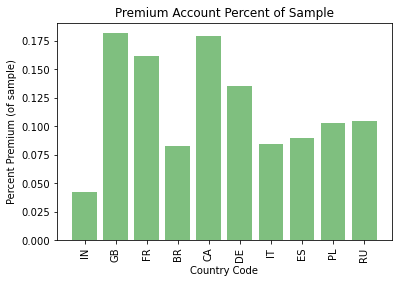

In [90]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

country_codes
x_axis = np.arange(len(country_codes))

# Create the ticks for our bar chart's x axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, country_codes,rotation=90)


percent_samples
est_population_premiums


plt.bar(x_axis,percent_samples, color='g', alpha=0.5, align='center')

# Give the chart a title, x label, and y label
plt.title("Premium Account Percent of Sample")
plt.xlabel("Country Code")
plt.ylabel("Percent Premium (of sample)")

Text(0, 0.5, 'Estimated Premium Accounts')

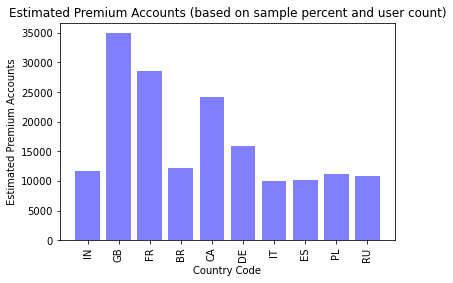

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

country_codes
x_axis = np.arange(len(country_codes))

# Create the ticks for our bar chart's x axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, country_codes,rotation=90)


percent_samples
est_population_premiums


plt.bar(x_axis,est_population_premiums, color='b', alpha=0.5, align='center')

# Give the chart a title, x label, and y label
plt.title("Estimated Premium Accounts (based on sample percent and user count)")
plt.xlabel("Country Code")
plt.ylabel("Estimated Premium Accounts")